In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import *

In [3]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
stroke['bmi'] = stroke['bmi'].fillna(stroke['bmi'].mean().round(2))

In [7]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893110,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
stroke['age'] = stroke['age'].astype(int)

In [9]:
stroke = stroke[stroke['age'] > 0]

In [10]:
stroke = stroke[~(stroke['gender'] == 'Other')]

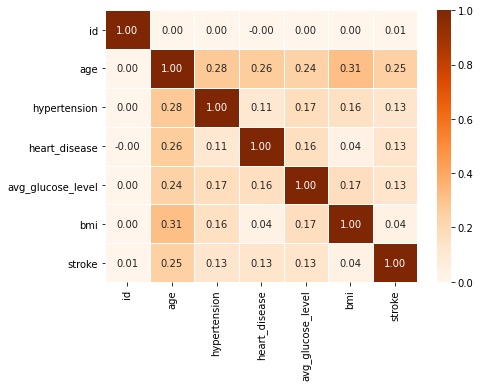

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(stroke.corr() , annot=True , cmap='Oranges' , fmt='.2f' , linewidths=1);

In [12]:
plt.style.use('bmh')

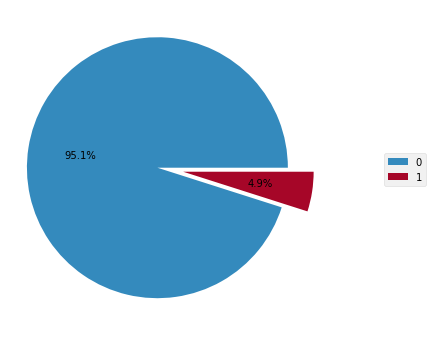

In [13]:
plt.figure(figsize=(6,6))
plt.pie(stroke['stroke'].value_counts() , autopct='%.1f%%' , explode=(0.1,0.1) , )
plt.legend(stroke['stroke'].value_counts().keys() , loc='center right' ,bbox_to_anchor=(1.3,0.5) );

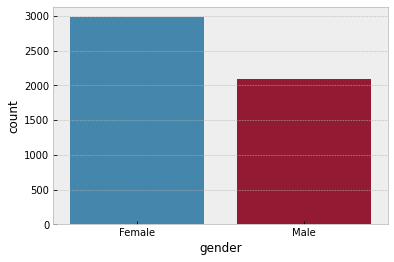

In [14]:
sns.countplot(data=stroke , x='gender' , order=stroke['gender'].value_counts().keys());

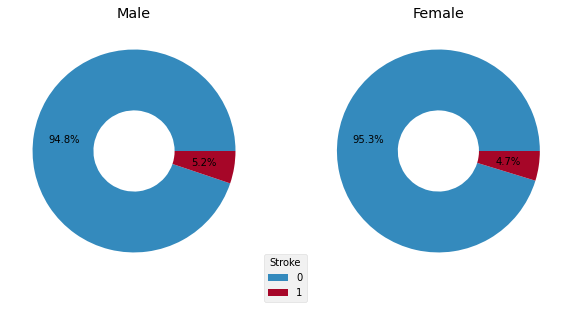

In [15]:
fig , ax = plt.subplots(1,2 , figsize=(10,10))

ax[0].pie(stroke[stroke['gender']=='Male']['stroke'].value_counts() , autopct='%.1f%%'  , wedgeprops=dict(width=0.6) , pctdistance=0.7)
ax[0].set_title('Male')
ax[1].pie(stroke[stroke['gender']=='Female']['stroke'].value_counts() , autopct='%.1f%%' ,wedgeprops=dict(width=0.6) , pctdistance=0.7)
ax[1].set_title('Female')

ax[0].legend(stroke['stroke'].value_counts().keys() , loc='center right' ,bbox_to_anchor=(1.2,0) , title='Stroke');

In [16]:
stroke.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
614,12465,Female,52,0,0,No,Private,Rural,88.04,42.1,never smoked,0


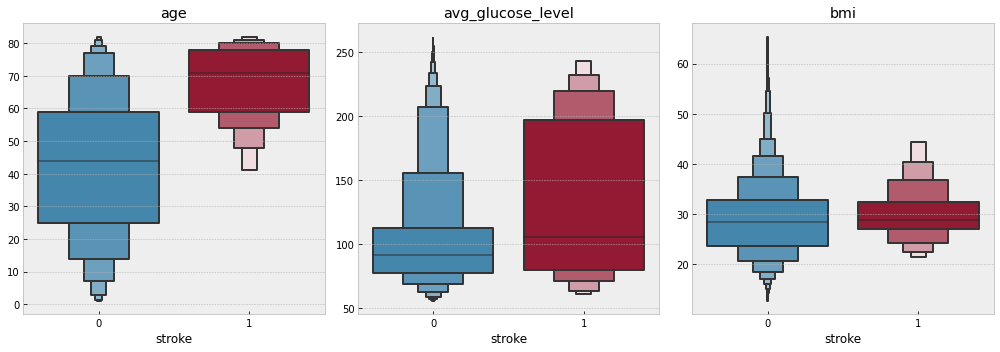

In [17]:
fig , ax = plt.subplots(1,3 , figsize=(14,5))

for i , c in enumerate(stroke[['age' , 'avg_glucose_level' , 'bmi']]):
    sns.boxenplot(data=stroke , x='stroke' , y=c ,showfliers=False, ax=ax[i])
    ax[i].set_title(c)
    ax[i].set_ylabel('')
plt.tight_layout()

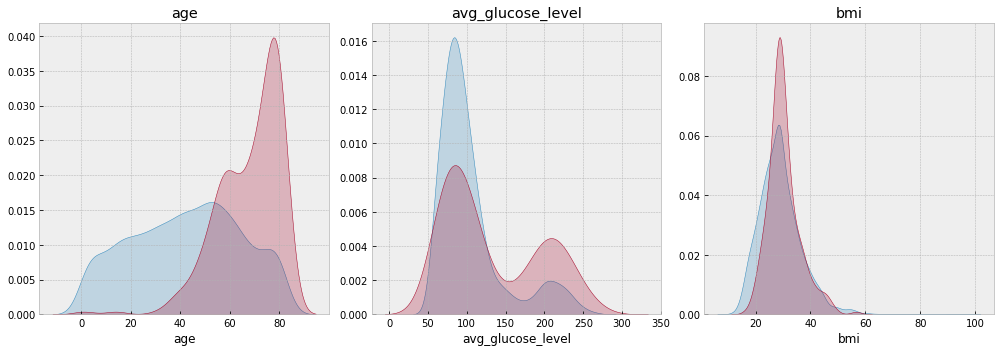

In [18]:
fig , ax = plt.subplots(1,3 , figsize=(14,5))

for i , c in enumerate(stroke[['age' , 'avg_glucose_level' , 'bmi']]):
    sns.kdeplot(data=stroke[stroke['stroke']==0] , x=c ,shade=True ,  ax=ax[i])
    sns.kdeplot(data=stroke[stroke['stroke']==1] , x=c ,shade=True ,  ax=ax[i])
    ax[i].set_title(c)
    ax[i].set_ylabel('')
plt.tight_layout()

(10.0, 70.0)

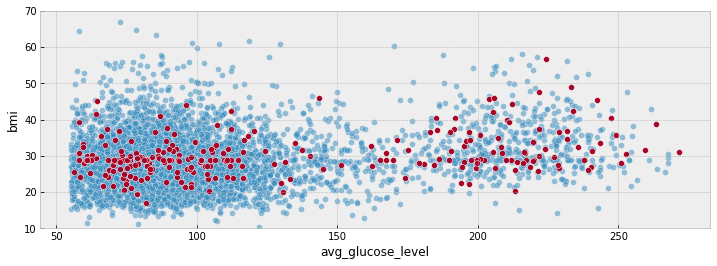

In [19]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=stroke[stroke['stroke']==0] , x='avg_glucose_level' , y='bmi' , alpha=0.5)
sns.scatterplot(data=stroke[stroke['stroke']==1] , x='avg_glucose_level' , y='bmi')
plt.ylim(ymin=10 , ymax=70)

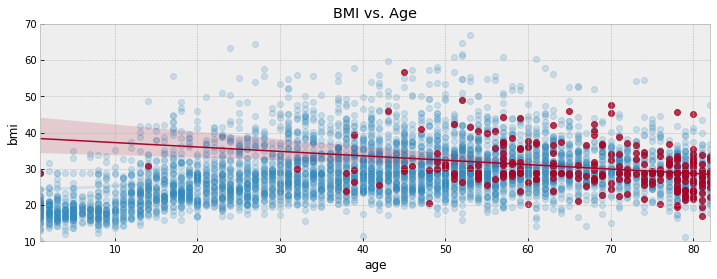

In [20]:
plt.figure(figsize=(12,4))
sns.regplot(data=stroke[stroke['stroke']==0]  , x='age' , y='bmi', line_kws=dict(linewidth=0),scatter_kws=dict(alpha=0.2))
sns.regplot(data=stroke[stroke['stroke']==1]  , x='age' , y='bmi', line_kws=dict(linewidth=1.5))
plt.title('BMI vs. Age')
plt.ylim(ymin=10 , ymax=70);

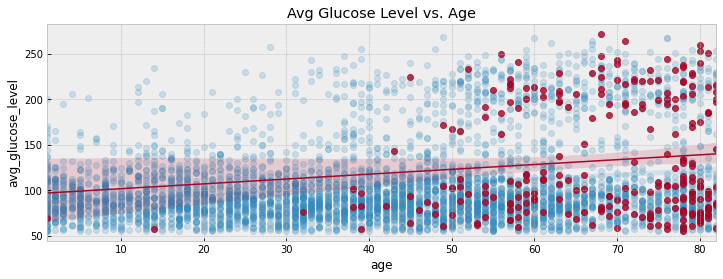

In [21]:
plt.figure(figsize=(12,4))
sns.regplot(data=stroke[stroke['stroke']==0]  , x='age' , y='avg_glucose_level', line_kws=dict(linewidth=0),scatter_kws=dict(alpha=0.2))
sns.regplot(data=stroke[stroke['stroke']==1]  , x='age' , y='avg_glucose_level', line_kws=dict(linewidth=1.5))
plt.title('Avg Glucose Level vs. Age');

### Smoking Status by Stroke Output = 1

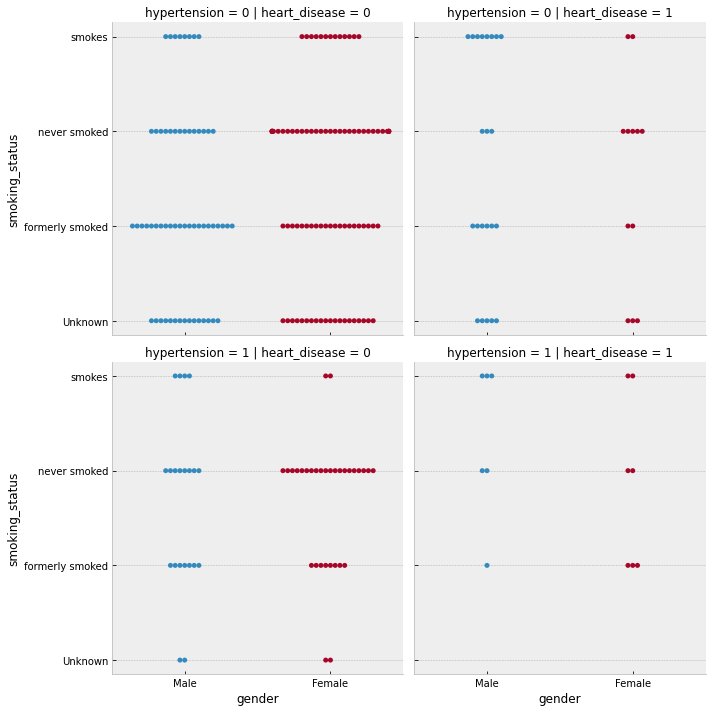

In [22]:
sns.catplot(data=stroke[stroke['stroke']==1] , x='gender' , y='smoking_status' 
            , row='hypertension',col='heart_disease' , kind='swarm' )
plt.tight_layout()

# Prediction

In [23]:
stroke = stroke.reset_index().drop('index' , axis=1)

In [24]:
stroke['stroke'].value_counts()

0    4817
1     249
Name: stroke, dtype: int64

In [25]:
output_1 = stroke[stroke['stroke'] == 1]
output_1.shape

(249, 12)

In [26]:
output_0 = stroke.sample(frac=1)[stroke['stroke'] == 0][:249]
output_0.shape

(249, 12)

In [27]:
stroke_sample = pd.concat([output_0 , output_1])

<AxesSubplot:xlabel='stroke', ylabel='count'>

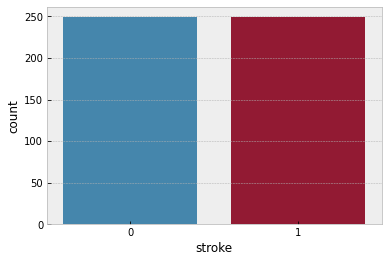

In [28]:
sns.countplot(data=stroke_sample , x='stroke')

In [29]:
features = stroke_sample.drop(['id' , 'stroke'] , axis=1)
target = stroke_sample['stroke']

In [30]:
lis_dum = []
for i in features.columns:
    if features[i].dtype == 'object':
        dum = features[i].str.get_dummies()
        lis_dum.append(dum)
        features.drop(i , axis=1 , inplace=True)

In [31]:
feat_dum = pd.concat(lis_dum , axis=1)

In [32]:
feat_dum.head()

,Female,Male,No,Yes,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
861,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1304,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
4907,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2004,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
3790,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1


In [33]:
features

,age,hypertension,heart_disease,avg_glucose_level,bmi
861,65,0,0,94.64,28.60
1304,61,0,0,74.82,30.60
4907,17,0,0,68.86,41.10
2004,20,0,0,80.08,25.10
3790,64,1,0,57.42,28.00
...,...,...,...,...,...
244,57,0,0,84.96,36.70
245,14,0,0,57.93,30.90
246,75,0,0,78.80,29.30
247,71,1,0,87.80,28.89


In [34]:
scaler = StandardScaler()

In [35]:
feat_scaled = scaler.fit_transform(features[['avg_glucose_level','bmi']])

In [36]:
features[['avg_glucose_level','bmi']] = feat_scaled

In [37]:
features

,age,hypertension,heart_disease,avg_glucose_level,bmi
861,65,0,0,-0.432627,-0.146557
1304,61,0,0,-0.793699,0.121920
4907,17,0,0,-0.902276,1.531425
2004,20,0,0,-0.697875,-0.616392
3790,64,1,0,-1.110685,-0.227100
...,...,...,...,...,...
244,57,0,0,-0.608973,0.940775
245,14,0,0,-1.101394,0.162192
246,75,0,0,-0.721193,-0.052590
247,71,1,0,-0.557235,-0.107628


In [38]:
features = pd.concat([features , feat_dum] , axis=1)
features

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,No,Yes,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
861,65,0,0,-0.432627,-0.146557,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1304,61,0,0,-0.793699,0.121920,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
4907,17,0,0,-0.902276,1.531425,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2004,20,0,0,-0.697875,-0.616392,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
3790,64,1,0,-1.110685,-0.227100,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,57,0,0,-0.608973,0.940775,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0
245,14,0,0,-1.101394,0.162192,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0
246,75,0,0,-0.721193,-0.052590,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
247,71,1,0,-0.557235,-0.107628,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0


In [39]:
x_train_sample , x_test_sample , y_train_sample , y_test_sample = train_test_split(features , target 
                                                                            ,random_state=59 , test_size=0.2)

In [40]:
model = RandomForestClassifier()

In [41]:
model.fit(x_train_sample , y_train_sample)

RandomForestClassifier()

In [42]:
model.score(x_train_sample , y_train_sample)

1.0

In [43]:
model.score(x_test_sample , y_test_sample)

0.81

In [44]:
y_pred = model.predict(x_test_sample)

In [45]:
print(classification_report(y_test_sample , y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        50
           1       0.83      0.78      0.80        50

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



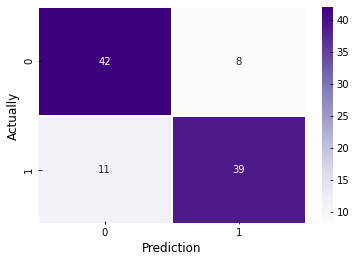

In [46]:
sns.heatmap(confusion_matrix(y_test_sample , y_pred) , annot=True , fmt='.0f' , cmap='Purples' , linewidths=2)
plt.xlabel('Prediction')
plt.ylabel('Actually');

### RandomForest Classifier with GridSearchCV

In [47]:
param = dict(n_estimators=[100,150,200] , criterion=['gini' , 'entropy'] , max_depth=np.arange(3,10))

In [48]:
model_cv = GridSearchCV(model , param_grid=param , cv=5)
model_cv.fit(x_train_sample , y_train_sample)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 150, 200]})

In [49]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=150)

In [50]:
y_pred = model_cv.predict(x_test_sample)

In [51]:
print(classification_report(y_test_sample , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        50
           1       0.77      0.86      0.81        50

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



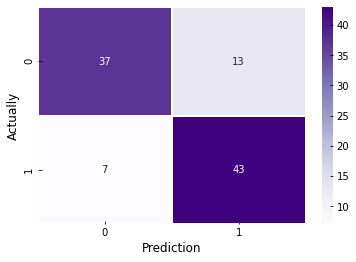

In [52]:
sns.heatmap(confusion_matrix(y_test_sample , y_pred) , annot=True , fmt='.0f' , cmap='Purples' , linewidths=2)
plt.xlabel('Prediction')
plt.ylabel('Actually');

In [53]:
feat_rank = pd.DataFrame(model.feature_importances_ , features.columns , columns=['score']).sort_values('score')

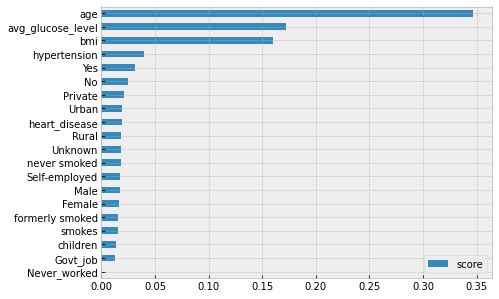

In [54]:
feat_rank.plot(kind='barh' , figsize=(7,5));

### Feature Selection

In [55]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [56]:
features = stroke[['age','avg_glucose_level','bmi']]
target = stroke['stroke']

In [57]:
features.head()

,age,avg_glucose_level,bmi
0,67,228.69,36.60
1,61,202.21,28.89
2,80,105.92,32.50
3,49,171.23,34.40
4,79,174.12,24.00


In [58]:
features[['avg_glucose_level','bmi']] = pd.DataFrame(scaler.fit_transform(features[['avg_glucose_level','bmi']])
                                                    , columns=[['avg_glucose_level','bmi']])

In [59]:
features.head()

,age,avg_glucose_level,bmi
0,67,2.697766,0.994265
1,61,2.114397,-0.012171
2,80,-0.006924,0.459065
3,49,1.431891,0.707084
4,79,1.495559,-0.650495


In [60]:
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.2 , shuffle=True)

In [61]:
model = RandomForestClassifier()

In [62]:
param = dict(n_estimators=[100,150,200] , criterion=['gini' , 'entropy'] , max_depth=np.arange(3,10))

In [63]:
model_cv = GridSearchCV(model , param_grid=param , cv=5)
model_cv.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 150, 200]})

In [64]:
print(f'Best Parameter = {model_cv.best_params_}')

Best Parameter = {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}


In [65]:
print(f'Best Score = {model_cv.best_score_}')

Best Score = 0.9491610722930082


In [66]:
y_pred = model_cv.predict(x_test)

In [67]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       971
           1       0.00      0.00      0.00        43

    accuracy                           0.96      1014
   macro avg       0.48      0.50      0.49      1014
weighted avg       0.92      0.96      0.94      1014



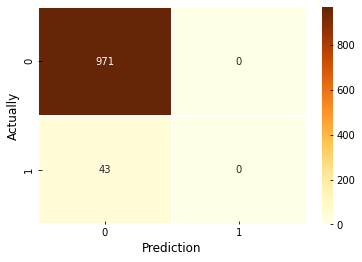

In [68]:
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , fmt='.0f' , cmap='YlOrBr' , linewidths=2)
plt.xlabel('Prediction')
plt.ylabel('Actually');

In [69]:
y_pred_proba = model_cv.predict_proba(x_test)[:,1]

In [70]:
tpr , fpr , th = roc_curve(y_test , y_pred_proba)

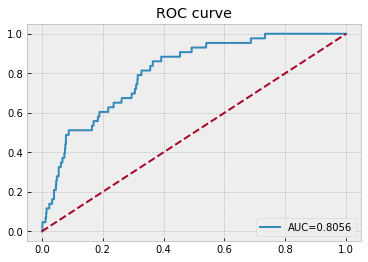

In [72]:
plt.plot(tpr , fpr , label=f'AUC={roc_auc_score(y_test , y_pred_proba).round(4)}')
plt.plot([0,1] , [0,1] , '--')
plt.title('ROC curve')
plt.legend(loc='lower right');